In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [101]:
FILE_PATH = "US_Accidents_March23.csv"  
CHUNK_SIZE = 100_000

# Columns we need for this project
COLUMNS_NEEDED = [
    'Start_Time', 'City', 'Severity', 'Weather_Condition', 'Visibility(mi)',
    'Amenity', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Stop', 'Traffic_Signal'
]


In [103]:
chunks = pd.read_csv(FILE_PATH, usecols=COLUMNS_NEEDED, chunksize=CHUNK_SIZE, low_memory=False)
data_frames = []

for chunk in chunks:
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'], errors='coerce')
    chunk = chunk.dropna(subset=['Start_Time'])
    
    # Time features
    chunk['Hour'] = chunk['Start_Time'].dt.hour
    chunk['Day'] = chunk['Start_Time'].dt.day_name()
    
    # Fill NaNs
chunk['City'] = chunk['City'].fillna("Unknown")
chunk['Weather_Condition'] = chunk['Weather_Condition'].fillna("Unknown")


data_frames.append(chunk)

In [104]:
df = pd.concat(data_frames, ignore_index=True)
print("Data Loaded:", df.shape)

Data Loaded: (28394, 15)


C:\Users\rodes\AppData\Local\Temp\ipykernel_21048\51089794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='coolwarm')


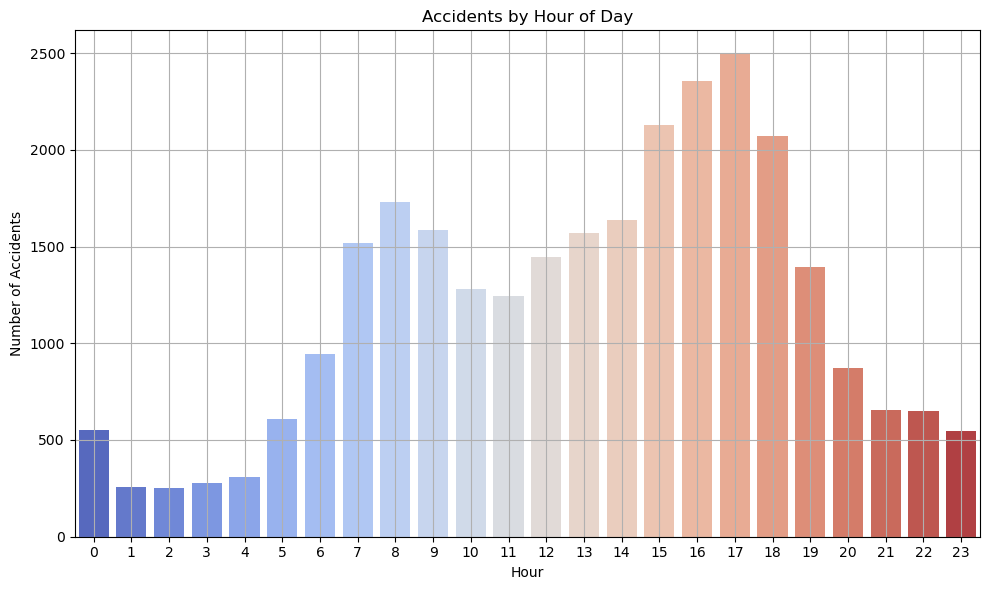

In [105]:
# 1. Accidents by Hour 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', palette='coolwarm')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\rodes\AppData\Local\Temp\ipykernel_21048\3264473368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=weather_df, y='Weather_Condition', order=top_weather, palette='Blues_r')


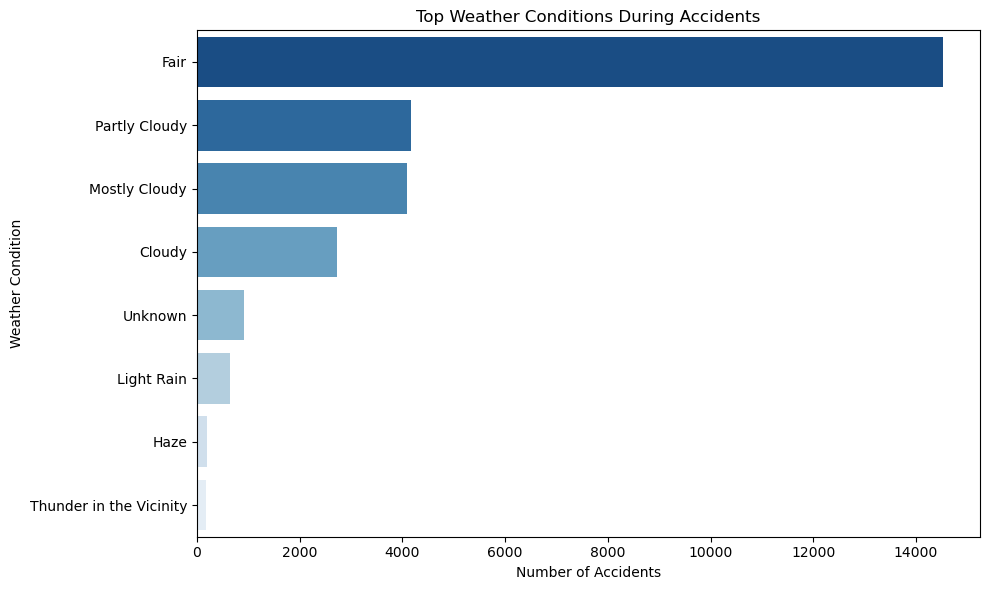

In [106]:
# 2. Top Weather Conditions
top_weather = df['Weather_Condition'].value_counts().nlargest(8).index
weather_df = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(10, 6))
sns.countplot(data=weather_df, y='Weather_Condition', order=top_weather, palette='Blues_r')
plt.title("Top Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

C:\Users\rodes\AppData\Local\Temp\ipykernel_21048\3492032770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Severity', y='Visibility(mi)', palette='Set2')


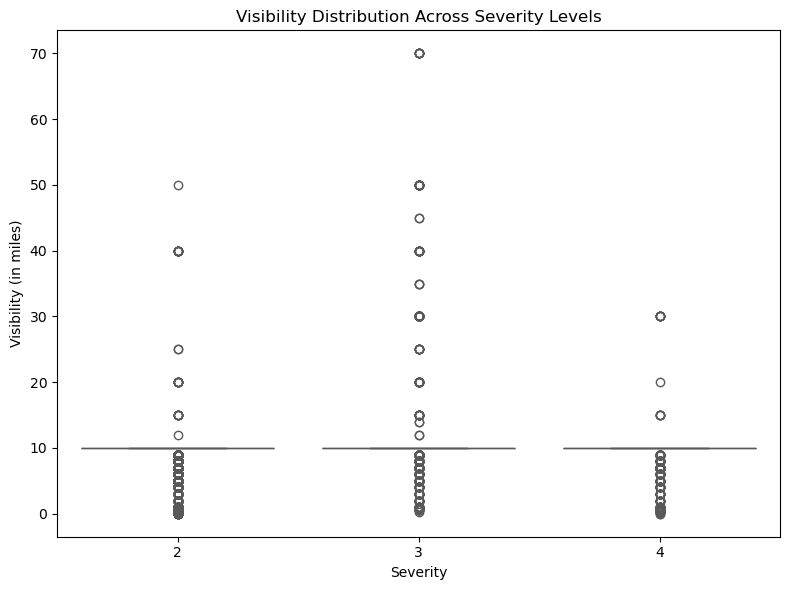

In [117]:
# 3. Severity vs Visibility 
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Severity', y='Visibility(mi)', palette='Set2')
plt.title("Visibility Distribution Across Severity Levels")
plt.xlabel("Severity")
plt.ylabel("Visibility (in miles)")
plt.tight_layout()
plt.show()

#Severity level 1 is not common in the selected chunk of dataset.

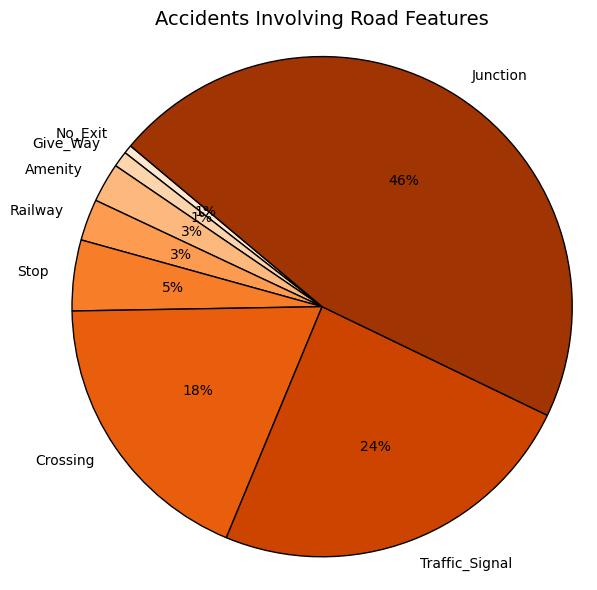

In [143]:
# 4. All Road Features Involved in Accidents 
road_features = [
    'Amenity', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway','Stop', 'Traffic_Signal'
]

available_features = [f for f in road_features if f in df.columns]
feature_counts = df[available_features].sum().sort_values(ascending=True)

feature_counts = feature_counts[feature_counts > 0]

colors = sns.color_palette("Oranges", n_colors=len(feature_counts))

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    feature_counts,
    labels=feature_counts.index,
    autopct='%1.0f%%',
    startangle=140,
    colors=colors,  # this goes from light to dark based on ascending counts
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Accidents Involving Road Features", fontsize=14)
plt.axis('equal')  # Equal aspect ratio to keep it circular
plt.tight_layout()
plt.show()

C:\Users\rodes\AppData\Local\Temp\ipykernel_21048\1951821970.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visibility_avg.values, y=visibility_avg.index, palette="Purples")


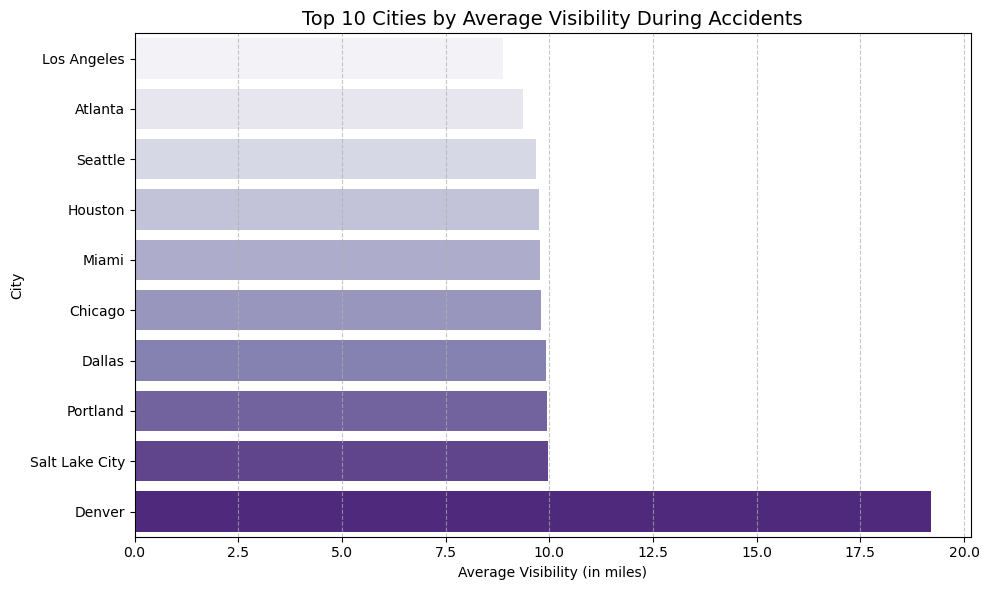

In [139]:
# 5. Top Cities by Average Visibility 
top_cities = df['City'].value_counts().nlargest(10).index
top_cities_df = df[df['City'].isin(top_cities)]
visibility_avg = top_cities_df.groupby('City')['Visibility(mi)'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=visibility_avg.values, y=visibility_avg.index, palette="Purples")

plt.title("Top 10 Cities by Average Visibility During Accidents", fontsize=14)
plt.xlabel("Average Visibility (in miles)")
plt.ylabel("City")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()